In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as pt

In [13]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Just to normalize the values
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

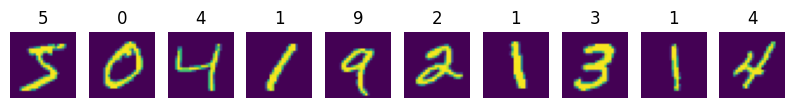

In [14]:
fig, axes = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
  axes[i].imshow(train_images[i].reshape(28, 28))
  axes[i].set_title(train_labels[i])
  axes[i].axis("off")
plt.show()

In [15]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer="adam", # Backpropagation
              loss="sparse_categorical_crossentropy", # Negative log
              metrics=["accuracy"])

history = model.fit(
    train_images,
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8714 - loss: 0.4297
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9676 - loss: 0.1050
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9788 - loss: 0.0663
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9836 - loss: 0.0530
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9867 - loss: 0.0403


In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Accuracy:", test_accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0893
Accuracy: 97.94999957084656
